In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [5]:
xtest[0].shape

(28, 28)

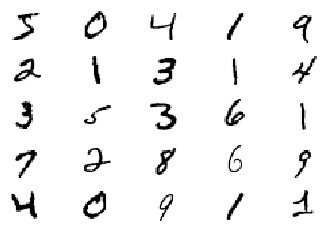

In [3]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
# alternative way of flattening
# from tensorflow.keras.utils import to_categorical


# xtrain.reshape(60000, 28*28)
# ytrain = to_categorical(ytrain, num_classes=10)

In [53]:
# normalizing
xtrain = xtrain / 255
xtest = xtest / 255

In [7]:
K.clear_session()

m = Sequential([  # a list of layers
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
])

In [8]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
epochs=30
m.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = m.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.4196 - accuracy: 0.8834 - val_loss: 0.2205 - val_accuracy: 0.9393
Epoch 2/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1919 - accuracy: 0.9454 - val_loss: 0.1570 - val_accuracy: 0.9558
Epoch 3/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1382 - accuracy: 0.9609 - val_loss: 0.1303 - val_accuracy: 0.9636
Epoch 4/30
375/375 [==============================] - 1s 4ms/step - loss: 0.1065 - accuracy: 0.9696 - val_loss: 0.1096 - val_accuracy: 0.9682
Epoch 5/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9757 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 6/30
375/375 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9797 - val_loss: 0.0954 - val_accuracy: 0.9723
Epoch 7/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0589 - accuracy: 0.9833 - val_loss: 0.0954 - val_accuracy: 0.9708
Epoch 

In [10]:
m.evaluate(xtest, ytest, batch_size=100)

100/100 [==============================] - 0s 2ms/step - loss: 21.4358 - accuracy: 0.9772


[21.43577003479004, 0.9771999716758728]

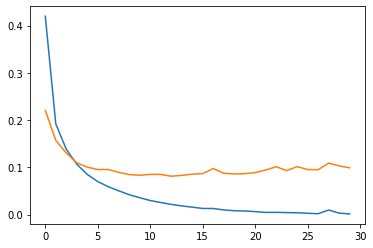

In [11]:
# inspect the history object
plt.plot(range(epochs), hist.history['loss'])
plt.plot(range(epochs), hist.history['val_loss'])

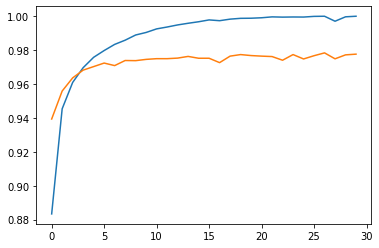

In [12]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['val_accuracy'])

In [13]:
# save a list of np.arrays with the weights
w = m.get_weights()

In [14]:
w[0].shape

(784, 128)

In [15]:
w[0][1][0]

-0.028708324

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


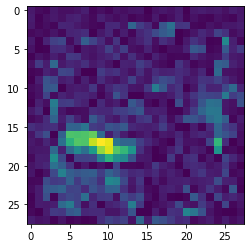

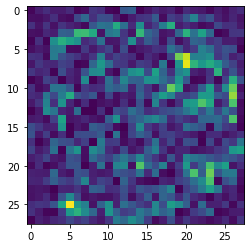

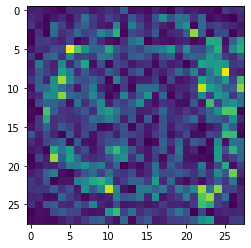

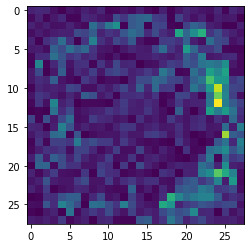

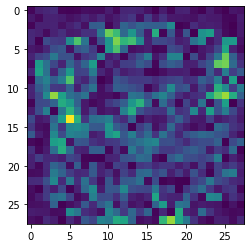

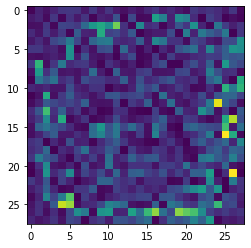

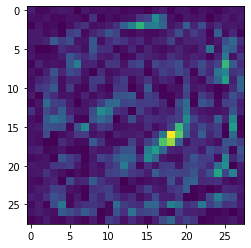

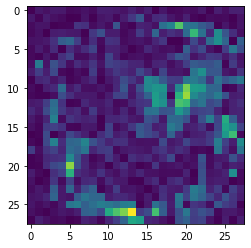

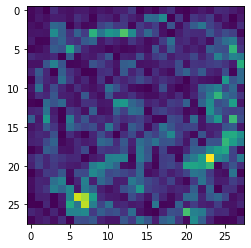

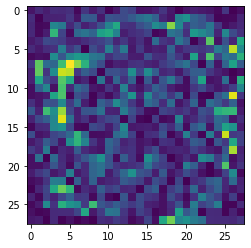

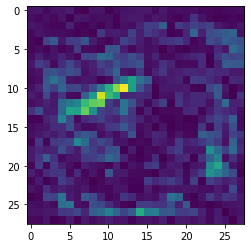

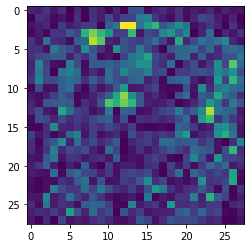

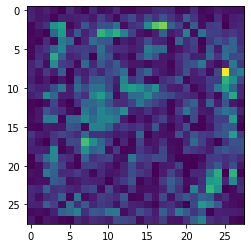

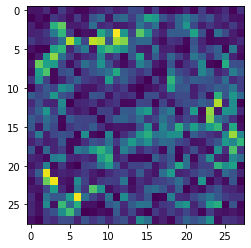

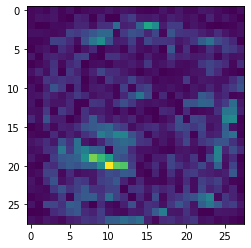

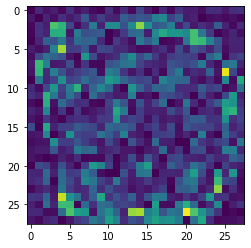

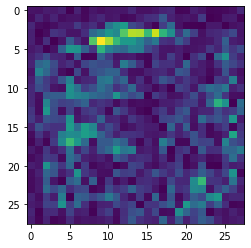

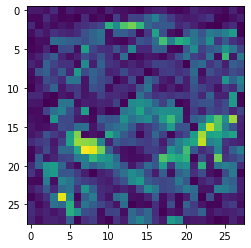

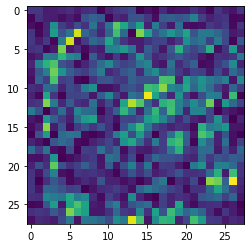

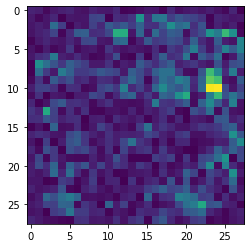

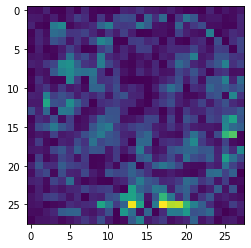

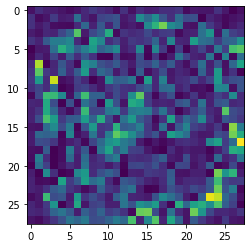

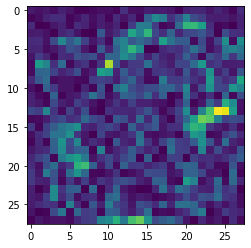

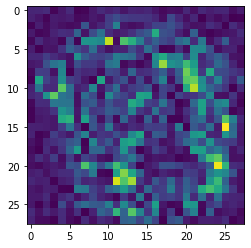

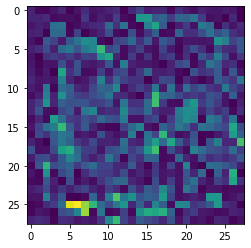

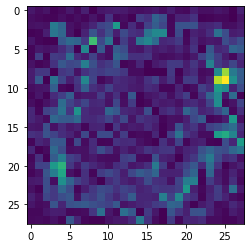

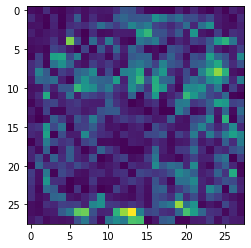

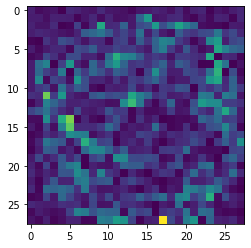

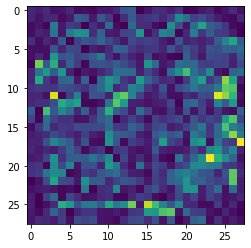

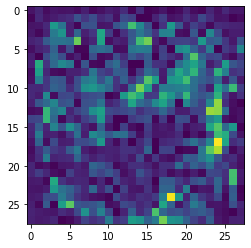

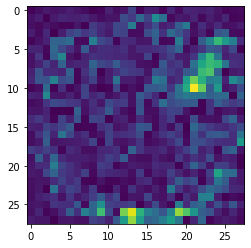

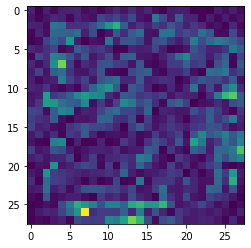

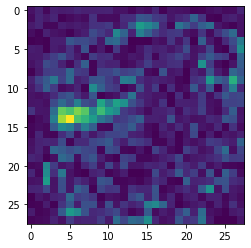

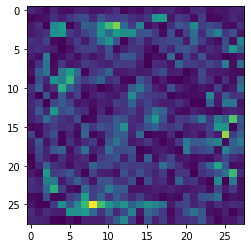

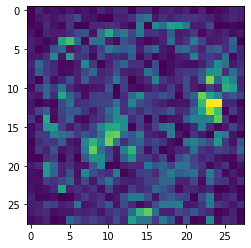

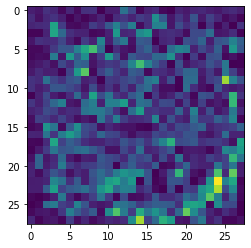

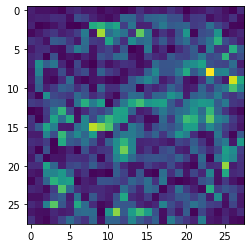

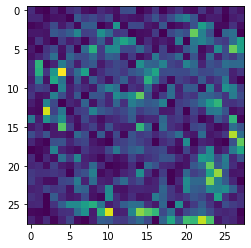

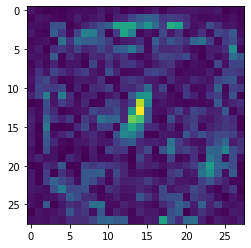

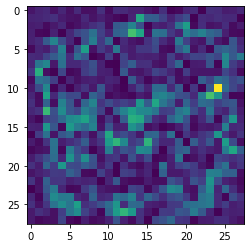

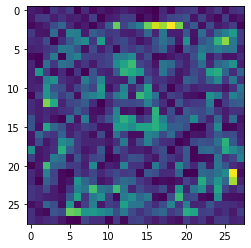

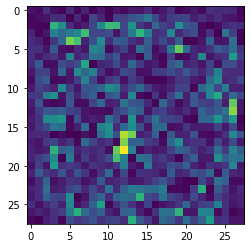

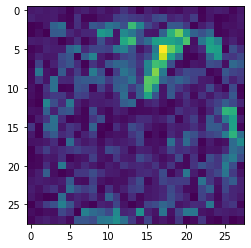

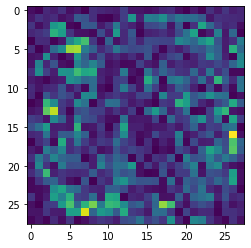

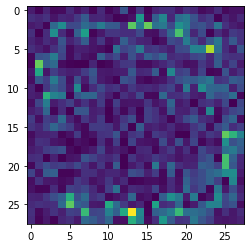

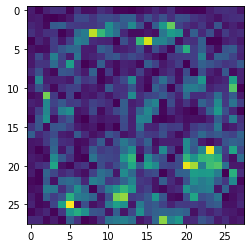

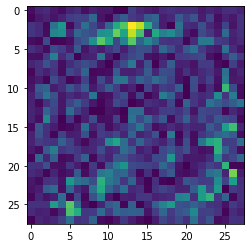

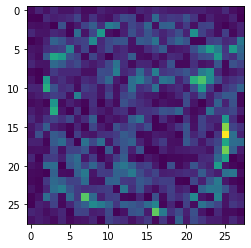

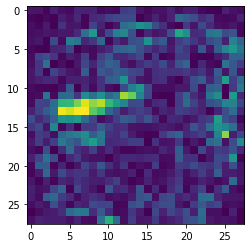

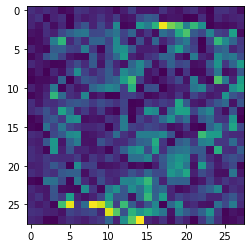

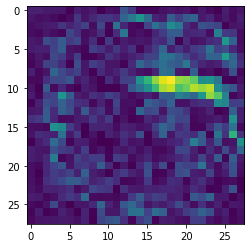

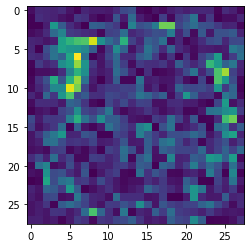

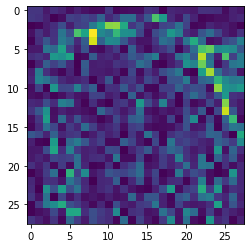

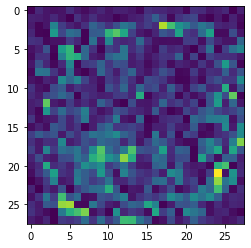

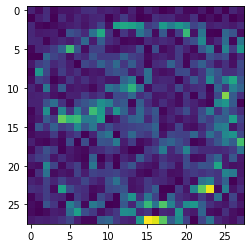

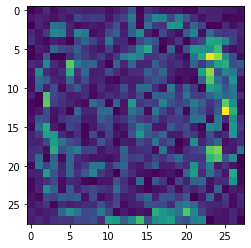

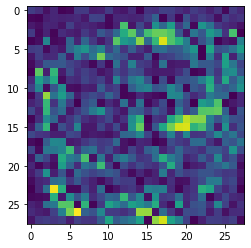

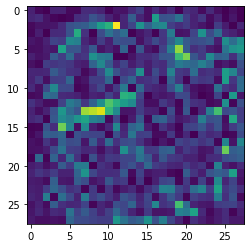

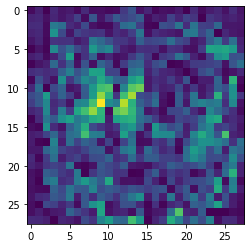

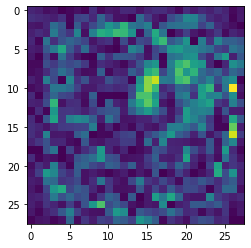

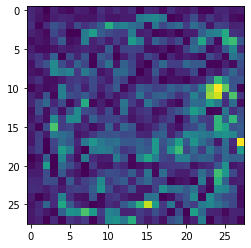

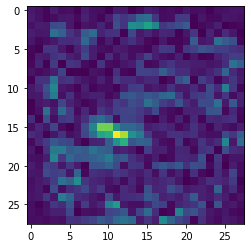

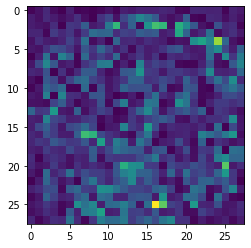

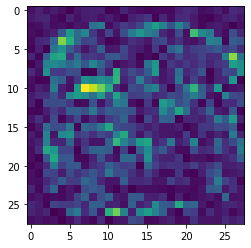

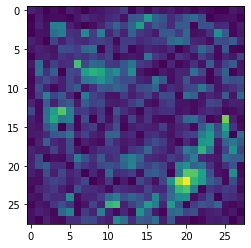

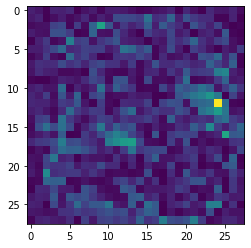

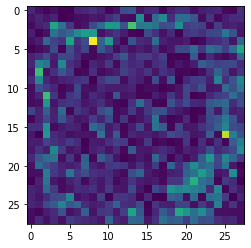

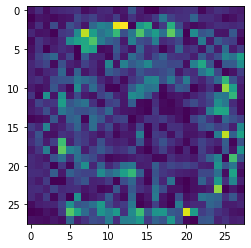

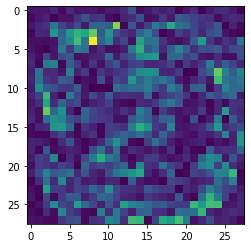

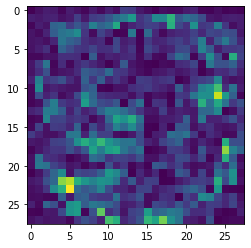

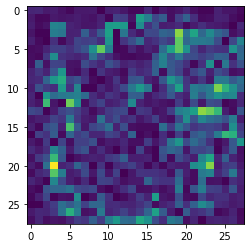

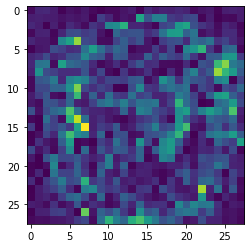

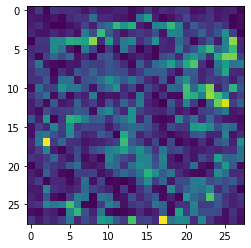

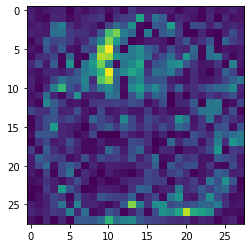

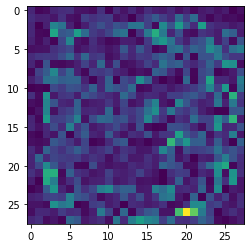

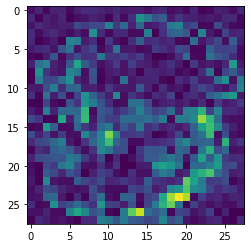

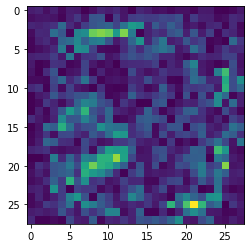

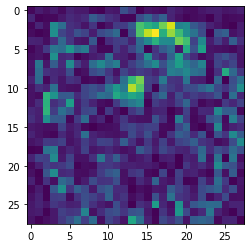

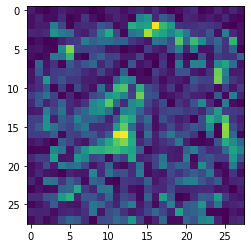

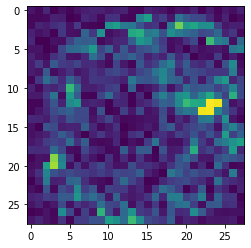

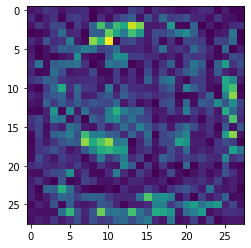

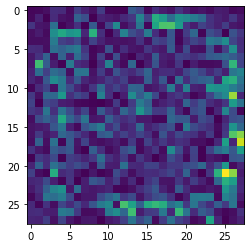

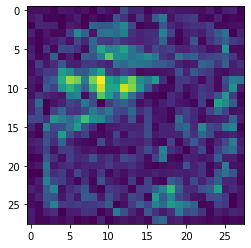

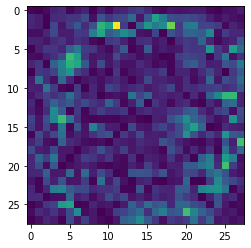

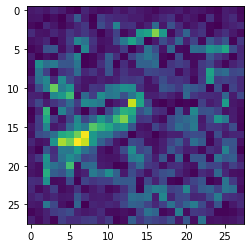

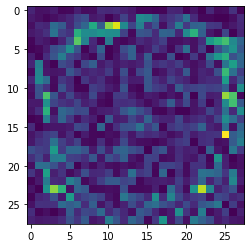

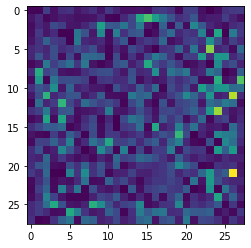

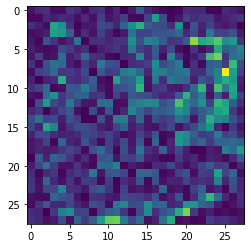

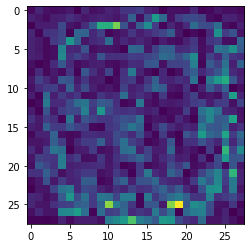

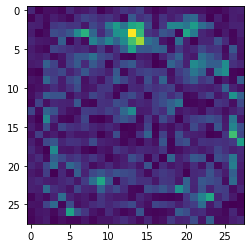

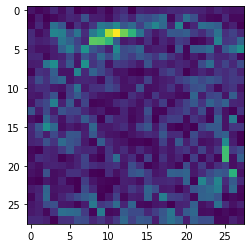

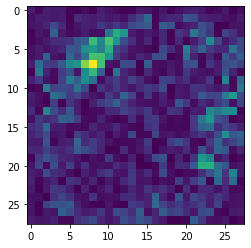

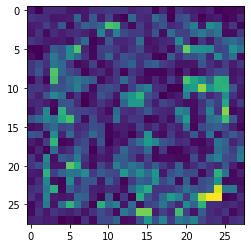

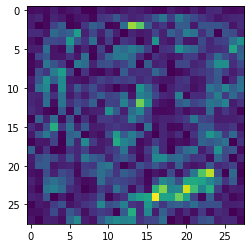

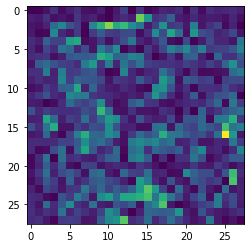

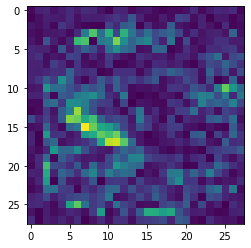

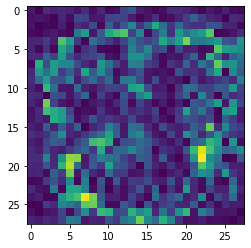

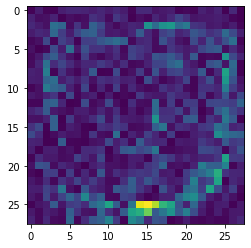

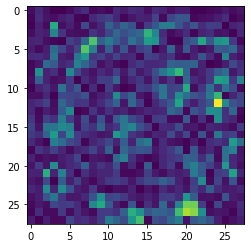

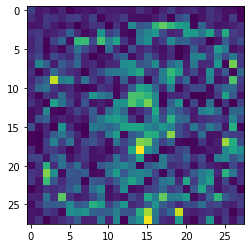

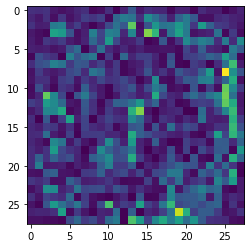

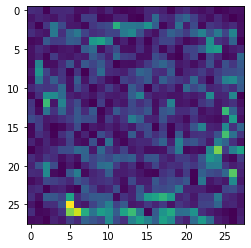

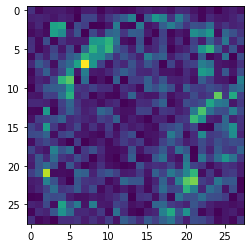

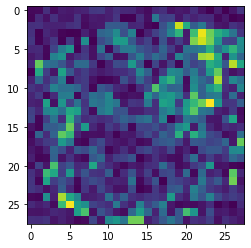

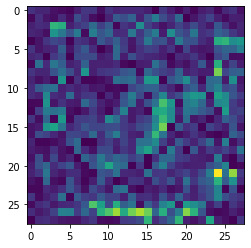

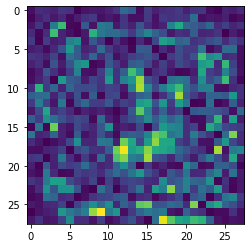

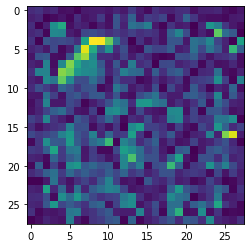

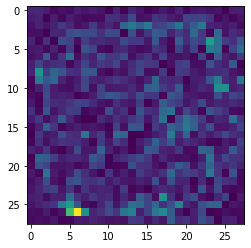

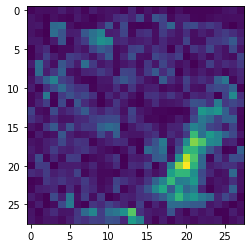

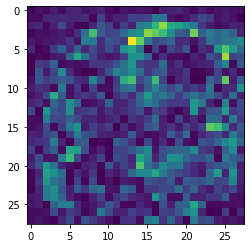

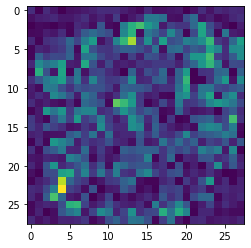

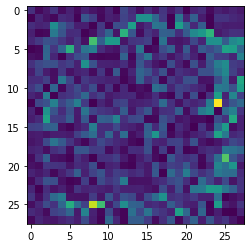

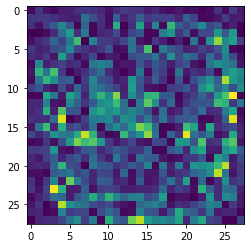

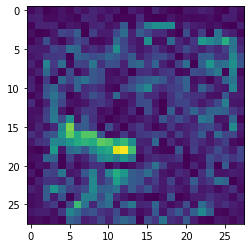

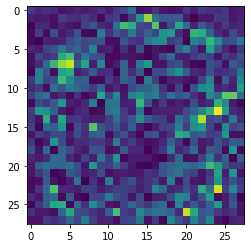

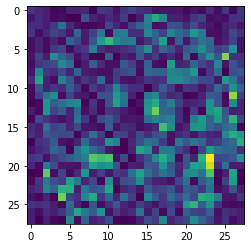

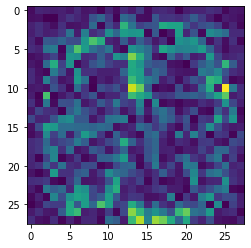

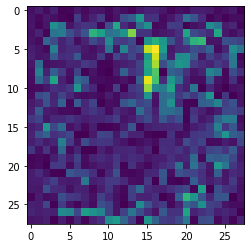

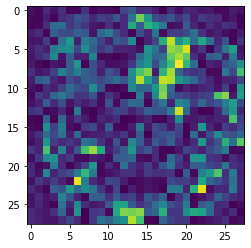

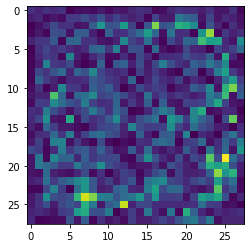

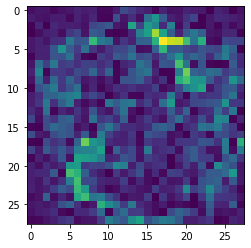

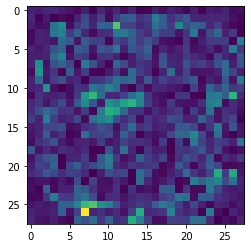

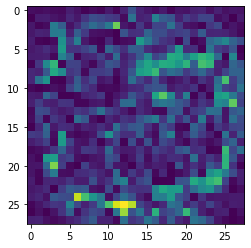

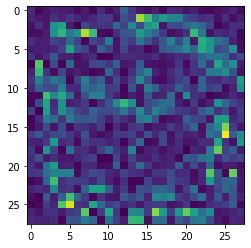

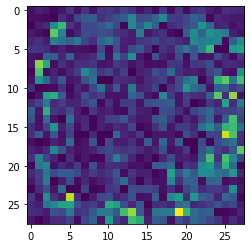

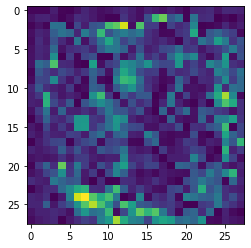

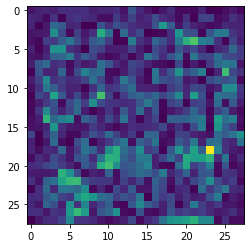

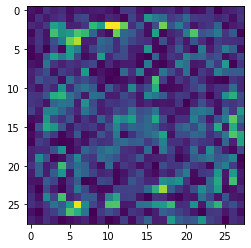

In [16]:
for k in range(128):
    weights = []
    for i in range(784):
        weights.append(w[0][i][k])
    weights = np.asarray(weights, dtype=float)

    plt.figure()
    plt.imshow(np.abs(weights).reshape((28, 28)))

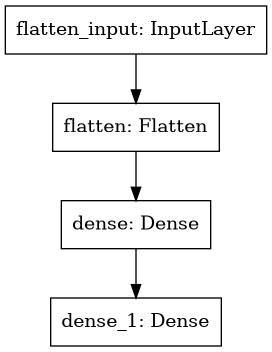

In [17]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(m,
   to_file='model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

### Convolutional Neural Network

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
callback = EarlyStopping(monitor='loss', patience=3)

In [6]:
# reshape dataset to have a single channel
xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

In [7]:
# convert from integers to floats
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [8]:
K.clear_session()

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [9]:
epochs=20
cnn.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = cnn.fit(xtrain, ytrain, epochs=epochs, batch_size=128, validation_split=0.2, callbacks=[callback])

Epoch 1/20
375/375 [==============================] - 18s 47ms/step - loss: 0.2246 - accuracy: 0.9364 - val_loss: 0.0916 - val_accuracy: 0.9711
Epoch 2/20
375/375 [==============================] - 17s 46ms/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0551 - val_accuracy: 0.9841
Epoch 3/20
375/375 [==============================] - 17s 46ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0572 - val_accuracy: 0.9832
Epoch 4/20
375/375 [==============================] - 17s 47ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0433 - val_accuracy: 0.9877
Epoch 5/20
375/375 [==============================] - 17s 46ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0459 - val_accuracy: 0.9882
Epoch 6/20
375/375 [==============================] - 18s 48ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0406 - val_accuracy: 0.9889
Epoch 7/20
375/375 [==============================] - 17s 47ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0364 - val_accuracy:

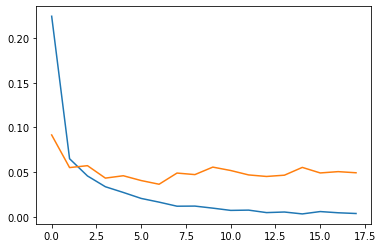

In [11]:
# inspect the history object
plt.plot(range(18), hist.history['loss'])
plt.plot(range(18), hist.history['val_loss'])

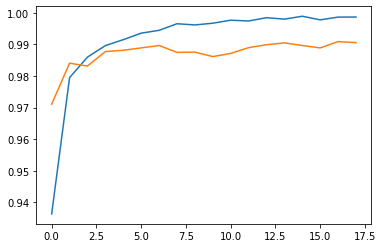

In [12]:
plt.plot(range(18), hist.history['accuracy'])
plt.plot(range(18), hist.history['val_accuracy'])

### Visualizing activations

In [8]:
# following code based on:
# https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8

In [23]:
from keras.models import Model


layer_outputs = [layer.output for layer in cnn.layers[1:7]]
activation_model = Model(inputs=cnn.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

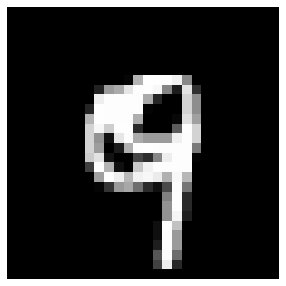

In [50]:
img = xtest[4444].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [51]:
activations = activation_model.predict(img)

/home/denniss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


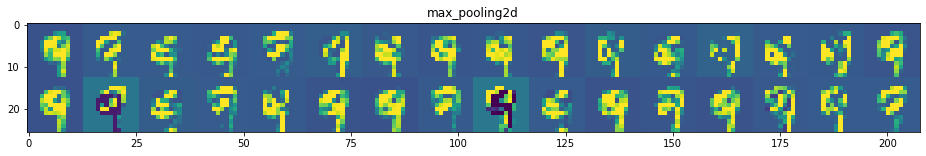

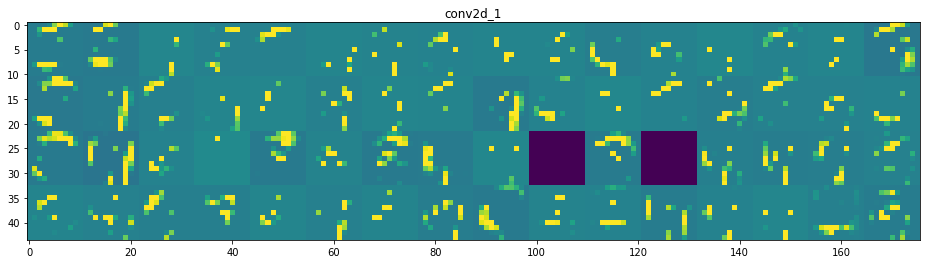

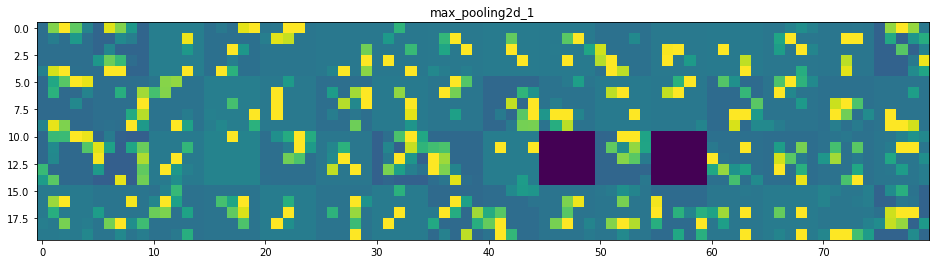

In [52]:
layer_names = []
for layer in cnn.layers[1:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image  # Displays the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

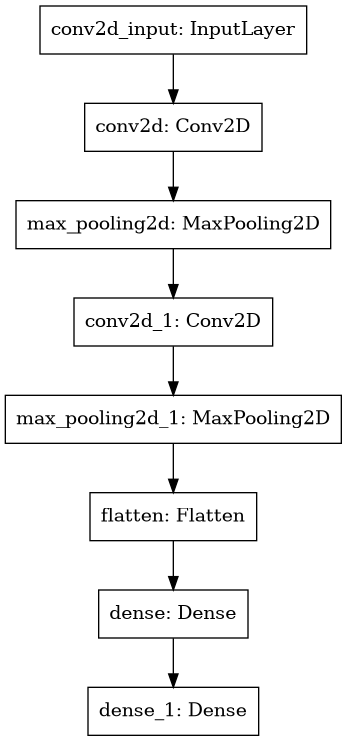

In [32]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(cnn,
   to_file='cnn.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)